<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/competitive_data_science_predict_future_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('competitive-data-science-predict-future-sales')
jovian.set_colab_id('12A9ZpIPYJBn4VX0y2KGscyn9ZFgTKnT1')

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

**Data fields description:**
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- date - date in format dd/mm/yyyy
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

## Dependencies

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
!pip install opendatasets --upgrade --q
import opendatasets as od
import os
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
url='https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data'

In [ ]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshaykadwe
Your Kaggle Key: ··········


  0%|          | 0.00/15.1M [00:00<?, ?B/s]

100%|██████████| 15.1M/15.1M [00:00<00:00, 22.5MB/s]



Extracting archive ./competitive-data-science-predict-future-sales/competitive-data-science-predict-future-sales.zip to ./competitive-data-science-predict-future-sales


In [ ]:
os.listdir('competitive-data-science-predict-future-sales')

['sample_submission.csv',
 'sales_train.csv',
 'test.csv',
 'shops.csv',
 'item_categories.csv',
 'items.csv']

In [ ]:
test=pd.read_csv('competitive-data-science-predict-future-sales/test.csv')
shops=pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')
items=pd.read_csv('competitive-data-science-predict-future-sales/items.csv')
item_categories=pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')
sales=pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv')

In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


## Join the datasets

In [ ]:
train=sales.join(items,on='item_id',rsuffix='_').join(shops,on='shop_id',rsuffix='_').join(item_categories,on='item_category_id',rsuffix='_').drop(columns=['shop_id_','item_id_','item_category_id_'],axis=1)

In [ ]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",Музыка - MP3


## Let's take a look at the raw data

In [ ]:
print(' The Train rows : {} \n Train columns :{}'.format(train.shape[0],train.shape[1]))

 The Train rows : 2935849 
 Train columns :10


In [ ]:
train.describe([0.25,0.5,0.75])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


## Time period of the dataset

In [ ]:
print('Min date from train set: %s' % train['date'].min())
print('Max date from train set: %s' % train['date'].max())

Min date from train set: 01.01.2013
Max date from train set: 31.12.2014


## Data leakages

About data leakages I'll only be using only the "shop_id" and "item_id" that appear on the test set.

In [ ]:
test_shop_ids=test.shop_id.unique()
test_item_ids=test.item_id.unique()

In [ ]:
# Only shops that exist in test set.
lk_train = train[train['shop_id'].isin(test_shop_ids)]## isin() function defines the dataframe each element whetehr contained in the list values
# Only items that exist in test set.
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

In [ ]:
print('Data set size before leaking :',train.shape[0])
print('Data set size after leaking :',lk_train.shape[0])

Data set size before leaking : 2935849
Data set size after leaking : 1224439


## Data cleaning 

Only records with "item_price" > 0.

`query()` option is used for we can find which row is satisfying the expression . also remember to use full expression with in the quotes including string and logical character.

In [ ]:
train=train.query('item_price>0')

## Data preprocessing
- I'm dropping the text features since I won't be doing anything with them.
- We are asked to predict total sales for every product and store in the next month, and our data is given by day, so let's remove unwanted columns and aggregate the data by month

In [ ]:
# Select only useful features.
train_monthly=lk_train[['date','date_block_num','shop_id','item_category_id','item_id','item_price','item_cnt_day']]

In [ ]:
train_monthly

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,37,22154,999.0,1.0
10,03.01.2013,0,25,55,2574,399.0,2.0
11,05.01.2013,0,25,55,2574,399.0,1.0
12,07.01.2013,0,25,55,2574,399.0,1.0
13,08.01.2013,0,25,55,2574,399.0,2.0
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,55,7409,299.0,1.0
2935845,09.10.2015,33,25,55,7460,299.0,1.0
2935846,14.10.2015,33,25,55,7459,349.0,1.0
2935847,22.10.2015,33,25,57,7440,299.0,1.0


In [ ]:
# Group by month in this case "date_block_num" and aggregate features.
train_monthly=train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'],as_index=False)

In [ ]:
train_monthly

In [ ]:
train_monthly=train_monthly.agg({'item_price':['sum','mean'],'item_cnt_day':['sum','mean','count']})

In [ ]:
train_monthly

date_block_num shop_id item_category_id  ... item_cnt_day                
                                                ...          sum      mean count
0                   0       2                2  ...          9.0  1.285714     7
1                   0       2                2  ...          0.0  0.000000     2
2                   0       2                5  ...          2.0  1.000000     2
3                   0       2                6  ...          3.0  1.000000     3
4                   0       2                6  ...          1.0  1.000000     1
...               ...     ...              ...  ...          ...       ...   ...
600154             33      59               75  ...          1.0  1.000000     1
600155             33      59               79  ...         13.0  1.300000    10
600156             33      59               83  ...          6.0  2.000000     3
600157             33      59               83  ...          2.0  1.000000     2
600158             33      59               83  ...          1.0  1.000000     1

[600159 rows x 9 columns]

In [ ]:
train_monthly.columns

MultiIndex([(  'date_block_num',      ''),
            (         'shop_id',      ''),
            ('item_category_id',      ''),
            (         'item_id',      ''),
            (      'item_price',   'sum'),
            (      'item_price',  'mean'),
            (    'item_cnt_day',   'sum'),
            (    'item_cnt_day',  'mean'),
            (    'item_cnt_day', 'count')],
           )

In [ ]:
# Rename features.
train_monthly.columns=['date_block_num','shop_id','item_category_id', 'item_id','item_price','mean_item_price','item_cnt','mean_item_cnt','transactions']

**To mimic the real behavior of the data we have to create the missing records from the loaded dataset, so for each month we need to create the missing records for each shop and item, since we don't have data for them I'll replace them with 0.**

In [ ]:

train_monthly

,date_block_num,shop_id,item_category_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,2,5572,10730.00,1532.857143,9.0,1.285714,7
1,0,2,2,5643,4775.21,2387.605000,0.0,0.000000,2
2,0,2,5,5583,1188.30,594.150000,2.0,1.000000,2
3,0,2,6,7893,5970.00,1990.000000,3.0,1.000000,3
4,0,2,6,7894,1490.00,1490.000000,1.0,1.000000,1
...,...,...,...,...,...,...,...,...,...
600154,33,59,75,5383,4390.00,4390.000000,1.0,1.000000,1
600155,33,59,79,17717,8025.50,802.550000,13.0,1.300000,10
600156,33,59,83,22087,357.00,119.000000,6.0,2.000000,3
600157,33,59,83,22088,238.00,119.000000,2.0,1.000000,2


In [ ]:
# Build a data set with all the possible combinations of ['date_block_num','shop_id','item_id'] so we won't have missing records.
shop_ids=train_monthly['shop_id'].unique()
item_ids=train_monthly['item_id'].unique()
empty_df=[]
for i in range(34):
  for shop in shop_ids:
    for item in item_ids:
      empty_df.append([i,shop,item])

In [ ]:
empty_df=pd.DataFrame(empty_df,columns=['date_block_num','shop_id','item_id'])

In [ ]:
empty_df

,date_block_num,shop_id,item_id
0,0,2,5572
1,0,2,5643
2,0,2,5583
3,0,2,7893
4,0,2,7894
...,...,...,...
6734443,33,36,9103
6734444,33,36,9107
6734445,33,36,5704
6734446,33,36,12733


Merge the train set with the complete set (missing records will be filled with 0).

In [ ]:
train_monthly=pd.merge(empty_df,train_monthly, on=['date_block_num','shop_id','item_id'],how='left')

In [ ]:
train_monthly

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,5572,2.0,10730.00,1532.857143,9.0,1.285714,7.0
1,0,2,5643,2.0,4775.21,2387.605000,0.0,0.000000,2.0
2,0,2,5583,5.0,1188.30,594.150000,2.0,1.000000,2.0
3,0,2,7893,6.0,5970.00,1990.000000,3.0,1.000000,3.0
4,0,2,7894,6.0,1490.00,1490.000000,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
6734443,33,36,9103,NaN,NaN,NaN,NaN,NaN,NaN
6734444,33,36,9107,NaN,NaN,NaN,NaN,NaN,NaN
6734445,33,36,5704,NaN,NaN,NaN,NaN,NaN,NaN
6734446,33,36,12733,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_monthly.head().T

,0,1,2,3,4
date_block_num,0.000000,0.000,0.00,0.0,0.0
shop_id,2.000000,2.000,2.00,2.0,2.0
item_id,5572.000000,5643.000,5583.00,7893.0,7894.0
item_category_id,2.000000,2.000,5.00,6.0,6.0
item_price,10730.000000,4775.210,1188.30,5970.0,1490.0
mean_item_price,1532.857143,2387.605,594.15,1990.0,1490.0
item_cnt,9.000000,0.000,2.00,3.0,1.0
mean_item_cnt,1.285714,0.000,1.00,1.0,1.0
transactions,7.000000,2.000,2.00,3.0,1.0


In [ ]:
train_monthly.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,6734448.0,16.500000,9.810709,0.0,8.00,16.5,25.00,33.000000
shop_id,6734448.0,31.642857,17.561894,2.0,16.00,34.5,47.00,59.000000
item_id,6734448.0,11041.890161,6210.744436,30.0,5385.25,11265.5,16068.25,22167.000000
item_category_id,600159.0,42.486151,17.742514,2.0,30.00,40.0,55.00,83.000000
item_price,600159.0,2102.755495,7012.469713,0.5,299.00,747.0,1849.00,515573.589744
mean_item_price,600159.0,911.491721,1565.815779,0.5,299.00,477.0,1099.00,42990.000000
item_cnt,600159.0,2.695571,11.289615,-4.0,1.00,1.0,2.00,2253.000000
mean_item_cnt,600159.0,1.091804,1.766292,-2.0,1.00,1.0,1.00,1000.000000
transactions,600159.0,2.040191,2.322403,1.0,1.00,1.0,2.00,31.000000


In [ ]:
# Extract time based features
train_monthly=train_monthly.assign(year=lambda x: x.date_block_num//12+2013)

In [ ]:
train_monthly=train_monthly.assign(month=lambda x: x.date_block_num%12)

In [ ]:
train_monthly

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,2,5572,2.0,10730.00,1532.857143,9.0,1.285714,7.0,2013,0
1,0,2,5643,2.0,4775.21,2387.605000,0.0,0.000000,2.0,2013,0
2,0,2,5583,5.0,1188.30,594.150000,2.0,1.000000,2.0,2013,0
3,0,2,7893,6.0,5970.00,1990.000000,3.0,1.000000,3.0,2013,0
4,0,2,7894,6.0,1490.00,1490.000000,1.0,1.000000,1.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
6734443,33,36,9103,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734444,33,36,9107,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734445,33,36,5704,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734446,33,36,12733,NaN,NaN,NaN,NaN,NaN,NaN,2015,9


## EDA

In [ ]:
# Grouping data for EDA.
gp_month_mean=train_monthly.groupby(['month'])['item_cnt'].mean()
gp_month_mean

month
0     2.719528
1     2.580119
2     2.697572
3     2.549022
4     2.566507
5     2.544360
6     2.318931
7     2.427736
8     2.751702
9     2.609906
10    3.274681
11    3.593816
Name: item_cnt, dtype: float64

In [ ]:
## using group by it takes group by column as index now to dismiised it we need to use the as_index=False drefault is True
gp_month_mean=train_monthly.groupby(['month'],as_index=False)['item_cnt'].mean()
gp_month_sum=train_monthly.groupby(['month'],as_index=False)['item_cnt'].sum()
gp_category_mean=train_monthly.groupby('item_category_id',as_index=False)['item_cnt'].mean()
gp_category_sum=train_monthly.groupby('item_category_id',as_index=False)['item_cnt'].sum()
gp_shop_mean=train_monthly.groupby('shop_id',as_index=False)['item_cnt'].mean()
gp_shop_sum=train_monthly.groupby('shop_id',as_index=False)['item_cnt'].sum()

### How sales behave along the year ?


Text(0.5, 1.0, 'Monthly Sum')

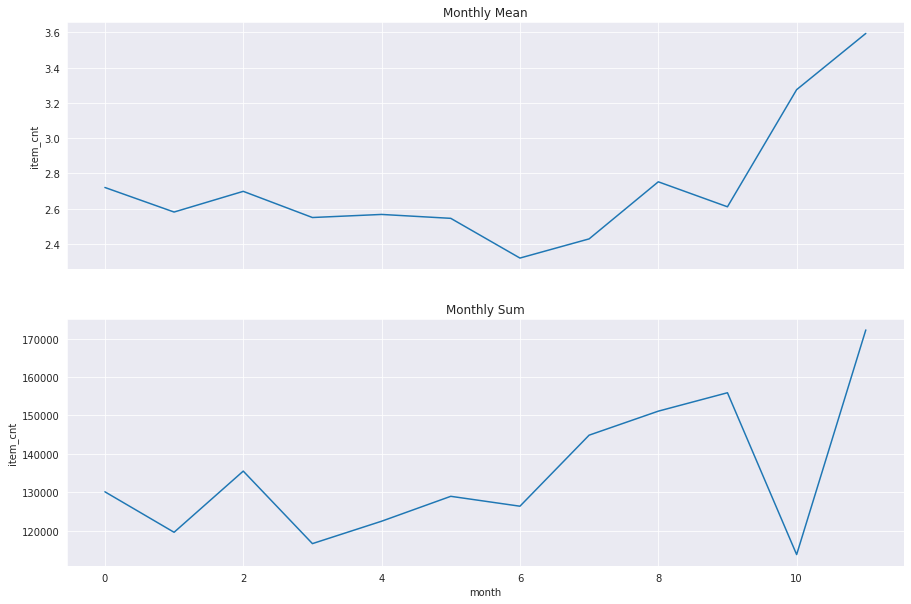

In [ ]:
f,axes=plt.subplots(2,1,figsize=(15,10),sharex=True)
sns.lineplot(data=gp_month_mean,x='month',y='item_cnt',ax=axes[0],markers='o').set_title('Monthly Mean')
sns.lineplot(data=gp_month_sum,x='month',y='item_cnt',ax=axes[1]).set_title('Monthly Sum')
#share_x mean the axes will not be shown individual it will be hsare between the 

**As we can see we have a trending increase of item sales count (mean) towards the ending of the year.**

**What category sells more?**

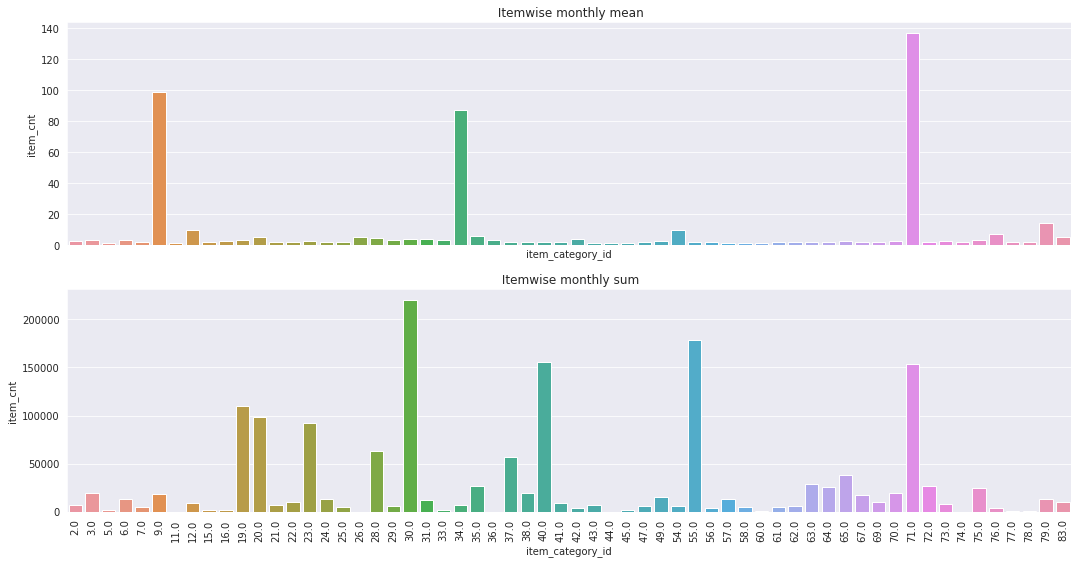

In [ ]:
f,axes=plt.subplots(2,1,sharex=True,figsize=(18,9))
sns.barplot(data=gp_category_mean,x='item_category_id',y='item_cnt',ax=axes[0]).set_title(' Itemwise monthly mean')
sns.barplot(data=gp_category_sum,x='item_category_id',y='item_cnt',ax=axes[1]).set_title(' Itemwise monthly sum')
plt.xticks(rotation=90)
plt.show()

Also only few of the categories seems to hold most of the sell count.

**Waht shops sells more?**

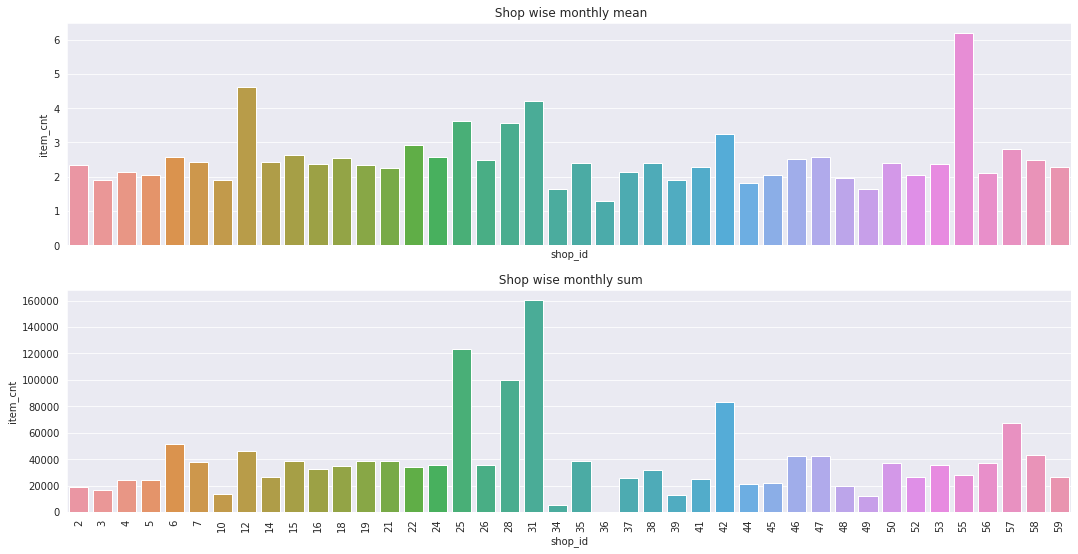

In [ ]:
f,axes=plt.subplots(2,1,sharex=True,figsize=(18,9))
sns.barplot(data=gp_shop_mean,x='shop_id',y='item_cnt',ax=axes[0]).set_title(' Shop wise monthly mean')
sns.barplot(data=gp_shop_sum,x='shop_id',y='item_cnt',ax=axes[1]).set_title(' Shop wise monthly sum')
plt.xticks(rotation=90)
plt.show()

Most of the shops have a similar sell rate, but 3 of them have a much higher rate, this may be a indicative of the shop size.

### Checking for teh outliers

In [ ]:
train_monthly

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,2,5572,2.0,10730.00,1532.857143,9.0,1.285714,7.0,2013,0
1,0,2,5643,2.0,4775.21,2387.605000,0.0,0.000000,2.0,2013,0
2,0,2,5583,5.0,1188.30,594.150000,2.0,1.000000,2.0,2013,0
3,0,2,7893,6.0,5970.00,1990.000000,3.0,1.000000,3.0,2013,0
4,0,2,7894,6.0,1490.00,1490.000000,1.0,1.000000,1.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
6734443,33,36,9103,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734444,33,36,9107,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734445,33,36,5704,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734446,33,36,12733,NaN,NaN,NaN,NaN,NaN,NaN,2015,9


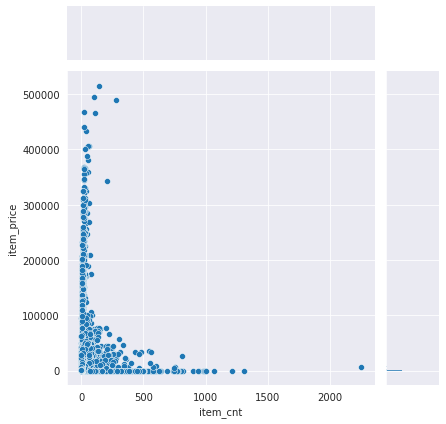

In [ ]:

sns.jointplot(x='item_cnt',y='item_price',data=train_monthly)

In [ ]:
train_monthly

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,2,5572,2.0,10730.00,1532.857143,9.0,1.285714,7.0,2013,0
1,0,2,5643,2.0,4775.21,2387.605000,0.0,0.000000,2.0,2013,0
2,0,2,5583,5.0,1188.30,594.150000,2.0,1.000000,2.0,2013,0
3,0,2,7893,6.0,5970.00,1990.000000,3.0,1.000000,3.0,2013,0
4,0,2,7894,6.0,1490.00,1490.000000,1.0,1.000000,1.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
6734443,33,36,9103,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734444,33,36,9107,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734445,33,36,5704,NaN,NaN,NaN,NaN,NaN,NaN,2015,9
6734446,33,36,12733,NaN,NaN,NaN,NaN,NaN,NaN,2015,9


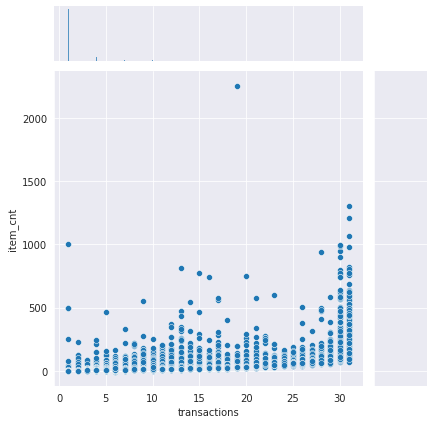

In [ ]:
sns.jointplot(data=train_monthly,x='transactions',y='item_cnt')

In [ ]:
jovian.commit()